In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\rchar\anaconda3\envs\pyc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK_exploded = df_DS_UK.explode('job_skills')

df_DS_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [5]:
# using df_DA find the count of skills and also the median salary for each skill
df_DS_skills = df_DS_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DS_job_count = len(df_DS_UK)  # Find count of Data AnScience  jobs in US with salary info

df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100

df_DS_skills = df_DS_skills[df_DS_skills['skill_count'] > 0]

df_DS_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,50,89885.0,66.666667
sql,46,97985.0,61.333333
aws,22,88128.0,29.333333
r,18,113360.5,24.000000
tableau,15,111500.0,20.000000
...,...,...,...
pyspark,1,160000.0,1.333333
kafka,1,87705.0,1.333333
kubernetes,1,88128.0,1.333333


In [6]:
skill_limit = 5

df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_limit]

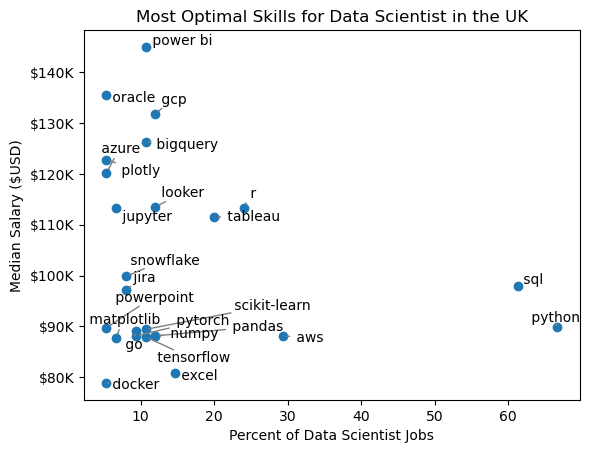

In [9]:
from adjustText import adjust_text

plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Scientist in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

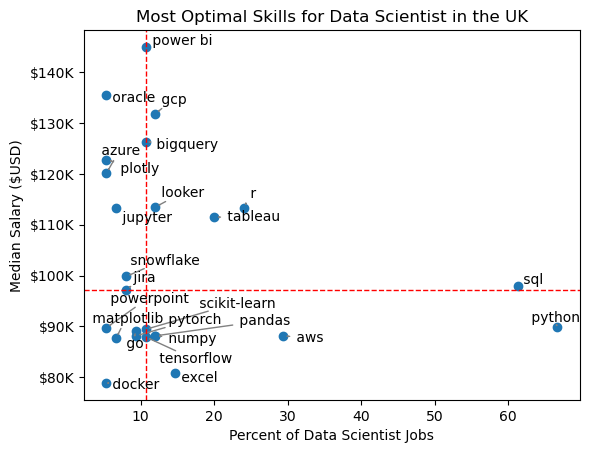

In [10]:
#with quadrant lines
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Assuming df_DS_skills_high_demand is your dataframe
plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for the y-axis
plt.title('Most Optimal Skills for Data Scientist in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Calculate midpoints for x and y axes
x_median = df_DS_skills_high_demand['skill_percent'].median()
y_median = df_DS_skills_high_demand['median_salary'].median()

# Draw the quadrant lines
plt.axhline(y=y_median, color='red', linestyle='--', linewidth=1)
plt.axvline(x=x_median, color='red', linestyle='--', linewidth=1)

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()
